In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("F:/New Coder/data/countries of the world.csv", encoding = 'latin-1')

In [3]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [4]:
data.tail()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,"31,3","0,00",0,"67,69",1900.0,"90,7","26,8","8,32","0,34","91,34",2,"28,01","21,84","0,179","0,243","0,579"


In [5]:
data.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null object
Coastline (coast/area ratio)          227 non-null object
Net migration                         224 non-null object
Infant mortality (per 1000 births)    224 non-null object
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null object
Phones (per 1000)                     223 non-null object
Arable (%)                            225 non-null object
Crops (%)                             225 non-null object
Other (%)                             225 non-null object
Climate                               205 non-null object
Birthrate                 

In [7]:
data.rename(columns={"Area (sq. mi.)": "Area", "Pop. Density (per sq. mi.)":"Pop_Density",
                        "Coastline (coast/area ratio)":"Coastline","Net migration":"Net_migration",
                        "Infant mortality (per 1000 births)":"Infant_mortality","GDP ($ per capita)":"GPD",
                        "Literacy (%)":"Literacy","Phones (per 1000)":"Phone_using","Arable (%)":"Arable",
                        "Crops (%)":"Crops","Other (%)":"Other"},inplace = True)
#We are using inplace=True to change column names in place.
data.columns

Index(['Country', 'Region', 'Population', 'Area', 'Pop_Density', 'Coastline',
       'Net_migration', 'Infant_mortality', 'GPD', 'Literacy', 'Phone_using',
       'Arable', 'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

In [8]:
data.Literacy = data.Literacy.str.replace(",",".").astype(float)
data.Pop_Density = data.Pop_Density.str.replace(",",".").astype(float)
data.Coastline = data.Coastline.str.replace(",",".").astype(float)
data.Net_migration = data.Net_migration.str.replace(",",".").astype(float)
data.Infant_mortality = data.Infant_mortality.str.replace(",",".").astype(float)
data.Phone_using = data.Phone_using.str.replace(",",".").astype(float)
data.Arable = data.Arable.str.replace(",",".").astype(float)
data.Crops = data.Crops.str.replace(",",".").astype(float)
data.Birthrate = data.Birthrate.str.replace(",",".").astype(float)
data.Deathrate = data.Deathrate.str.replace(",",".").astype(float)
data.Agriculture = data.Agriculture.str.replace(",",".").astype(float)
data.Industry = data.Industry.str.replace(",",".").astype(float)
data.Service = data.Service.str.replace(",",".").astype(float)
data.Other = data.Other.str.replace(",",".").astype(float)
data.Climate = data.Climate.str.replace(",",".").astype(float)


In [9]:
data.info()
missing = data.isnull().sum()
missing
data.fillna(data.mean(),inplace=True)
data.Region = data.Region.str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country             227 non-null object
Region              227 non-null object
Population          227 non-null int64
Area                227 non-null int64
Pop_Density         227 non-null float64
Coastline           227 non-null float64
Net_migration       224 non-null float64
Infant_mortality    224 non-null float64
GPD                 226 non-null float64
Literacy            209 non-null float64
Phone_using         223 non-null float64
Arable              225 non-null float64
Crops               225 non-null float64
Other               225 non-null float64
Climate             205 non-null float64
Birthrate           224 non-null float64
Deathrate           223 non-null float64
Agriculture         212 non-null float64
Industry            211 non-null float64
Service             212 non-null float64
dtypes: float64(16), int64(2), object(2)
memory usage: 35.5+ KB


In [10]:
Top10Coutn = data.nlargest(10, 'Population')
print(Top10Coutn)

            Country                Region  Population      Area  Pop_Density  \
42           China   ASIA (EX. NEAR EAST)  1313973713   9596960        136.9   
94           India   ASIA (EX. NEAR EAST)  1095351995   3287590        333.2   
214  United States       NORTHERN AMERICA   298444215   9631420         31.0   
95       Indonesia   ASIA (EX. NEAR EAST)   245452739   1919440        127.9   
27          Brazil    LATIN AMER. & CARIB   188078227   8511965         22.1   
156       Pakistan   ASIA (EX. NEAR EAST)   165803560    803940        206.2   
16      Bangladesh   ASIA (EX. NEAR EAST)   147365352    144000       1023.4   
169         Russia    C.W. OF IND. STATES   142893540  17075200          8.4   
152        Nigeria     SUB-SAHARAN AFRICA   131859731    923768        142.7   
103          Japan   ASIA (EX. NEAR EAST)   127463611    377835        337.4   

     Coastline  Net_migration  Infant_mortality      GPD  Literacy  \
42        0.15          -0.40             24.18  

In [11]:
#Calculating Population Density of the countries
data['Persons/sq. mi.'] = data['Population']/data['Area']
data.head()

,Country,Region,Population,Area,Pop_Density,Coastline,Net_migration,Infant_mortality,GPD,Literacy,...,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Persons/sq. mi.
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,12.13,0.22,87.65,1.0,46.60,20.34,0.380000,0.240000,0.380000,47.964474
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,21.09,4.42,74.49,3.0,15.11,5.22,0.232000,0.188000,0.579000,124.587971
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,3.22,0.25,96.53,1.0,17.14,4.61,0.101000,0.600000,0.298000,13.826065
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,10.00,15.00,75.00,2.0,22.46,3.27,0.150844,0.282711,0.565283,290.422111
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,2.22,0.00,97.78,3.0,8.71,6.25,0.150844,0.282711,0.565283,152.138889


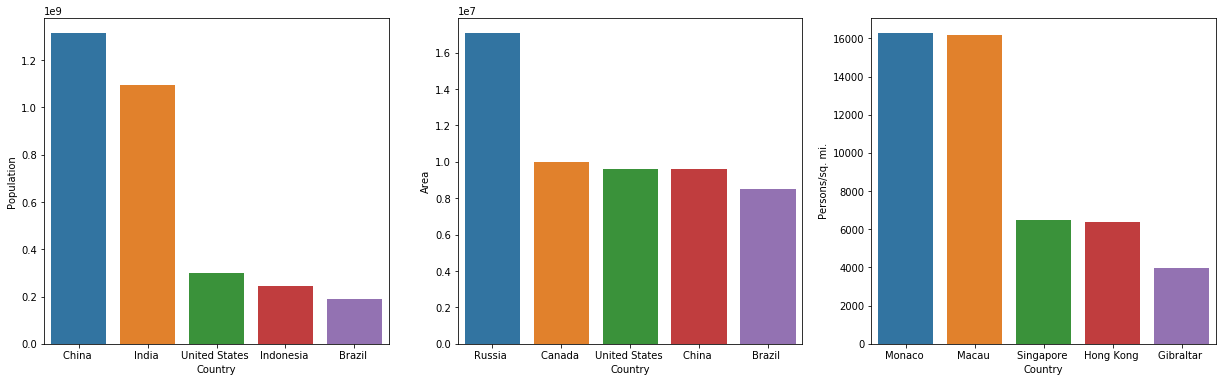

In [12]:
#Graphing Top Countries
f, ax = plt.subplots(1,3, figsize = (21, 6))
k1 = sns.barplot(data = data.nlargest(5, 'Population'), x = 'Country', y = 'Population', ax = ax[0])
k2 = sns.barplot(data = data.nlargest(5, 'Area'), x = 'Country', y = 'Area', ax = ax[1])
k3 = sns.barplot(data = data.nlargest(5, 'Persons/sq. mi.'), x = 'Country', y = 'Persons/sq. mi.', ax = ax[2])
plt.show()
#ka = sns.barplot(data = data.nlargest(5, 'Population'), x = 'Country', y = 'Area')


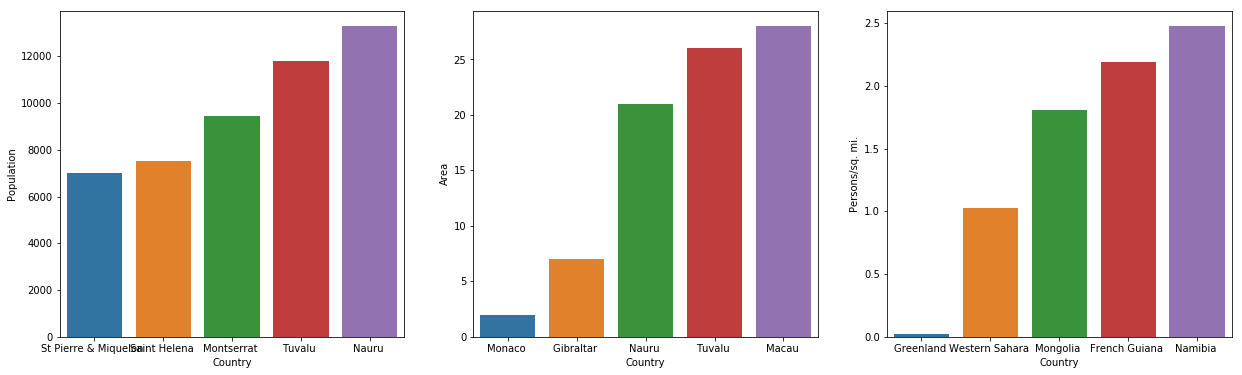

In [13]:
#Bottom Countries
f, ax = plt.subplots(1,3, figsize = (21, 6))
k1 = sns.barplot(data = data.nsmallest(5, 'Population'), x = 'Country', y = 'Population', ax = ax[0])
k2 = sns.barplot(data = data.nsmallest(5, 'Area'), x = 'Country', y = 'Area', ax = ax[1])
k3 = sns.barplot(data = data.nsmallest(5, 'Persons/sq. mi.'), x = 'Country', y = 'Persons/sq. mi.', ax = ax[2])
plt.show()


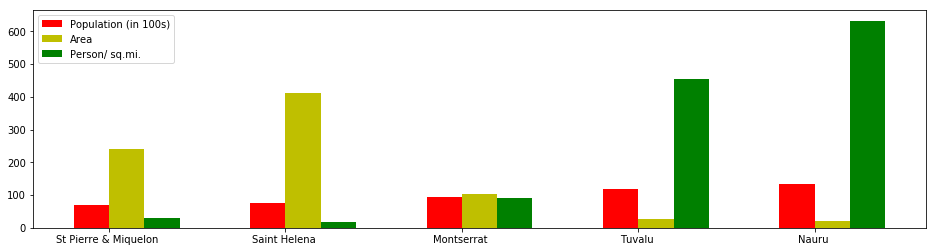

In [14]:
N = 5

fig, ax = plt.subplots(figsize = (16,4))
ind = np.arange(N)
width = 0.2
p1 = ax.bar(ind, data.nsmallest(5, 'Population')['Population']/100, width, color= 'r')
p2 = ax.bar(ind + width, data.nsmallest(5, 'Population')['Area'], width, color= 'y')
p3 = ax.bar(ind + width + width, data.nsmallest(5, 'Population')['Population']/data.nsmallest(5, 'Population')['Area'], width, color= 'g')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(data.nsmallest(5, 'Population')['Country'])
ax.legend((p1[0], p2[0], p3[0]), ('Population (in 100s)', 'Area', 'Person/ sq.mi.'))
plt.show()

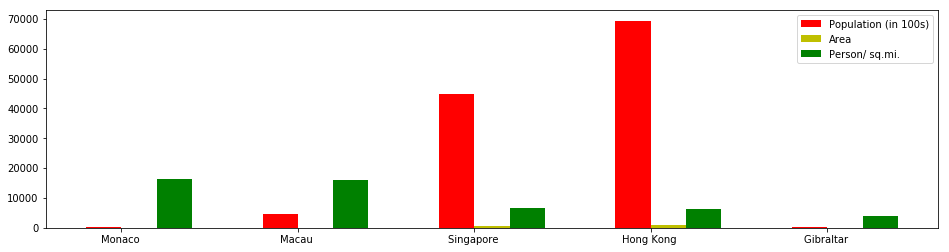

In [15]:
N = 5
fig, ax = plt.subplots(figsize = (16,4))
ind = np.arange(N)
width = 0.2
p1 = ax.bar(ind, data.nlargest(5, 'Persons/sq. mi.')['Population']/100, width, color= 'r')
p2 = ax.bar(ind + width, data.nlargest(5, 'Persons/sq. mi.')['Area'], width, color= 'y')
p3 = ax.bar(ind + width + width, data.nlargest(5, 'Persons/sq. mi.')['Population']/data.nlargest(5, 'Persons/sq. mi.')['Area'], width, color= 'g')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(data.nlargest(5, 'Persons/sq. mi.')['Country'])
ax.legend((p1[0], p2[0], p3[0]), ('Population (in 100s)', 'Area', 'Person/ sq.mi.'))
plt.show()

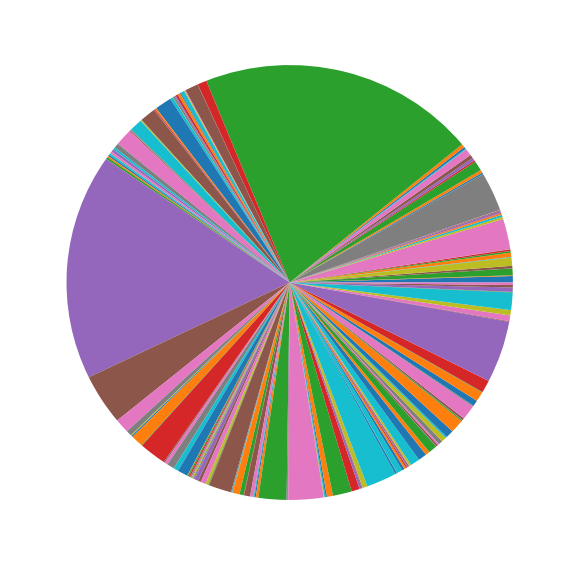

In [16]:
plt.subplots(figsize = (10,10))
labels = data['Country']
label = data['Population']
plt.pie(data['Population'])
plt.show()


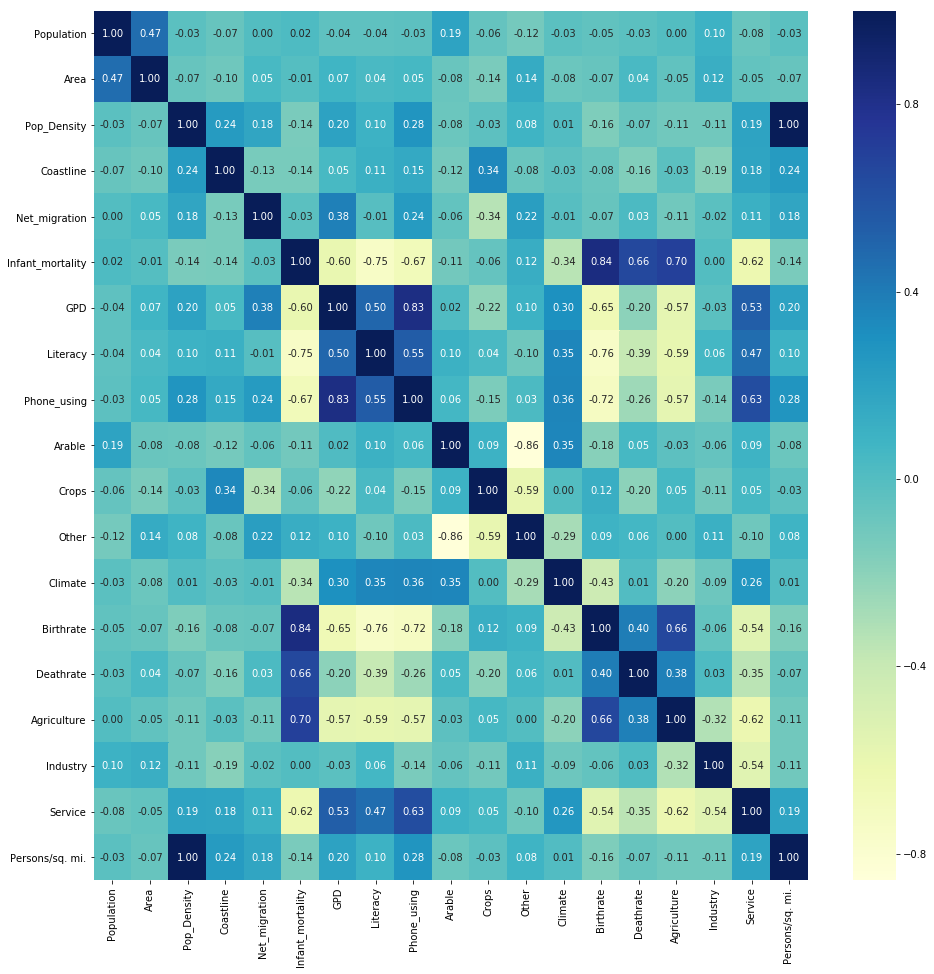

In [17]:
plt.figure(figsize=(16,16))

sns.heatmap(data=data.iloc[:,2:].corr(), cmap="YlGnBu", annot=True, fmt=".2f")

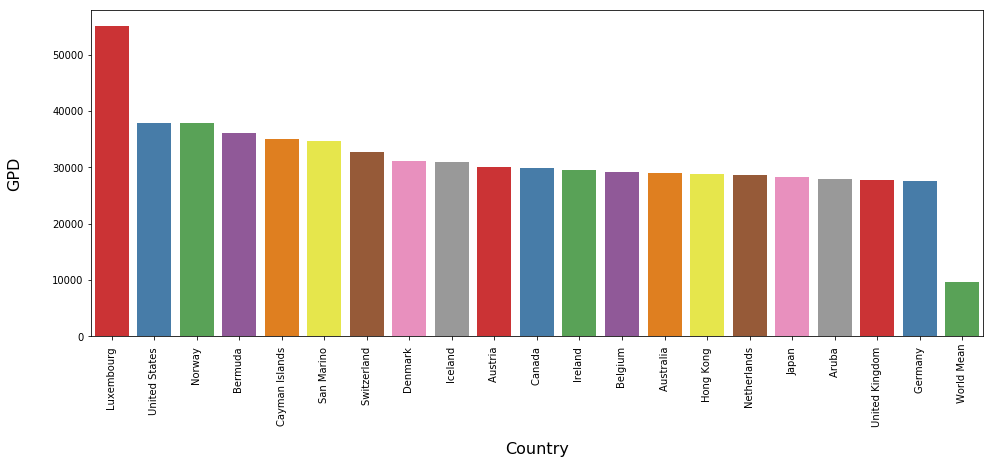

In [18]:
fig, ax = plt.subplots(figsize=(16,6))
top_gdp_countries = data.sort_values('GPD',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World Mean'], 'GPD':[data['GPD'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GPD']],mean],ignore_index=True)
sns.barplot(x='Country', y='GPD', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Text(0.5,1,'Number of Countries by Region')

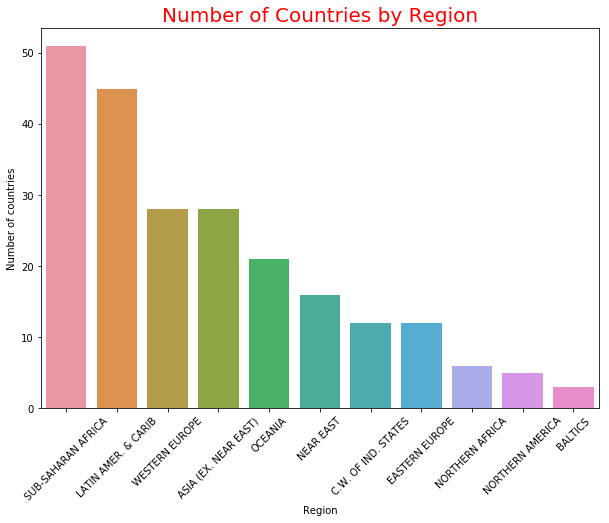

In [19]:
Region = data.Region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=Region.index,y=Region.values)
plt.xticks(rotation=45)
plt.ylabel('Number of countries')
plt.xlabel('Region')
plt.title('Number of Countries by Region',color = 'red',fontsize=20)

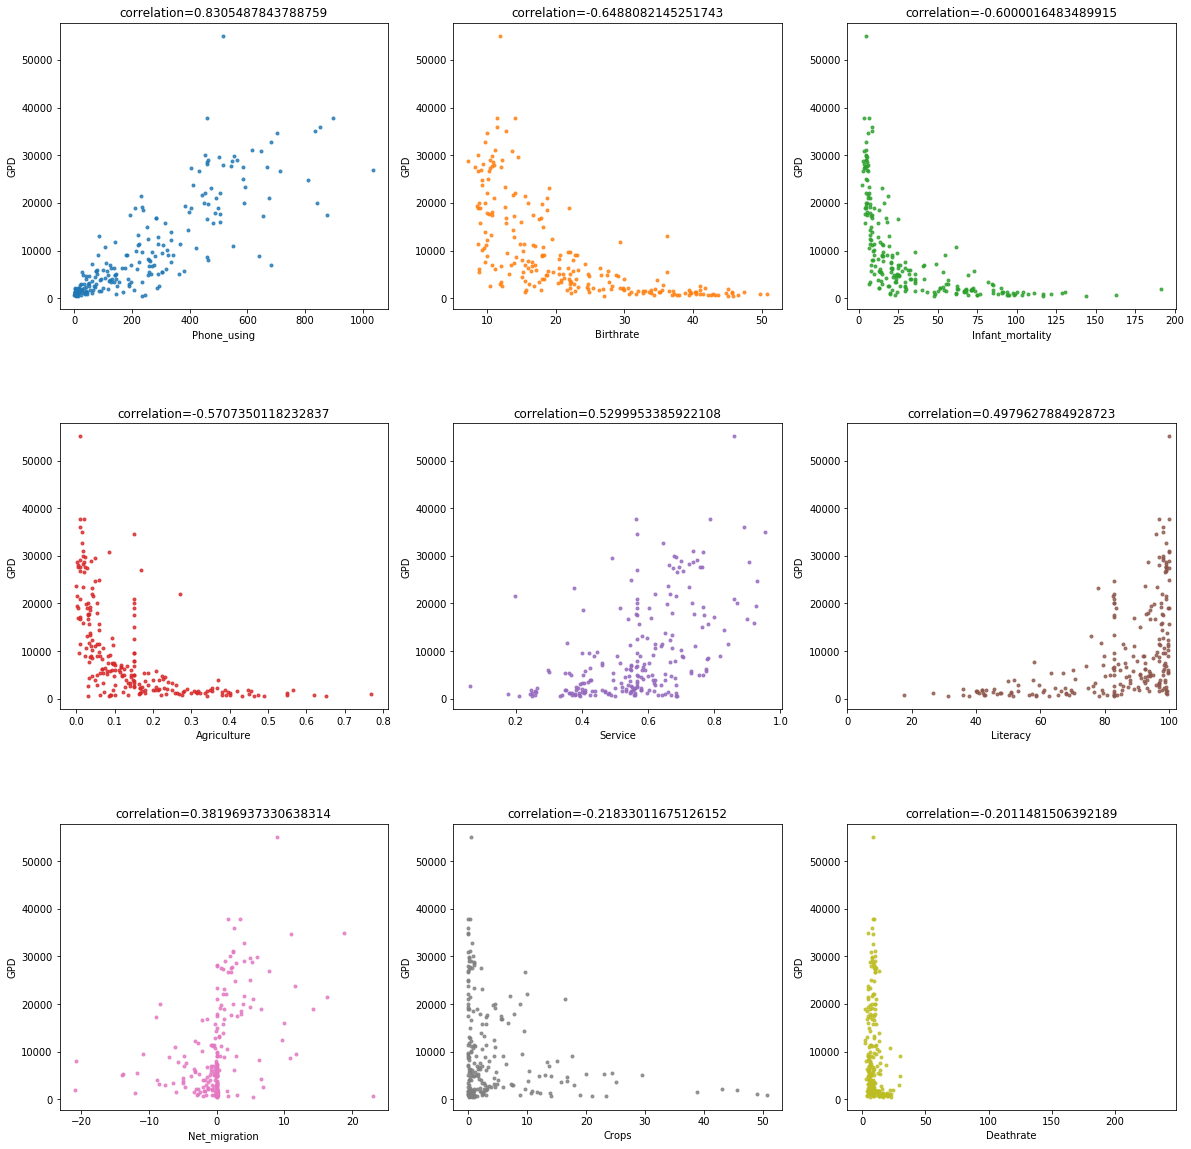

In [20]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GPD')&(col!='Climate')):
        corr_to_gdp[col] = data['GPD'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GPD', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

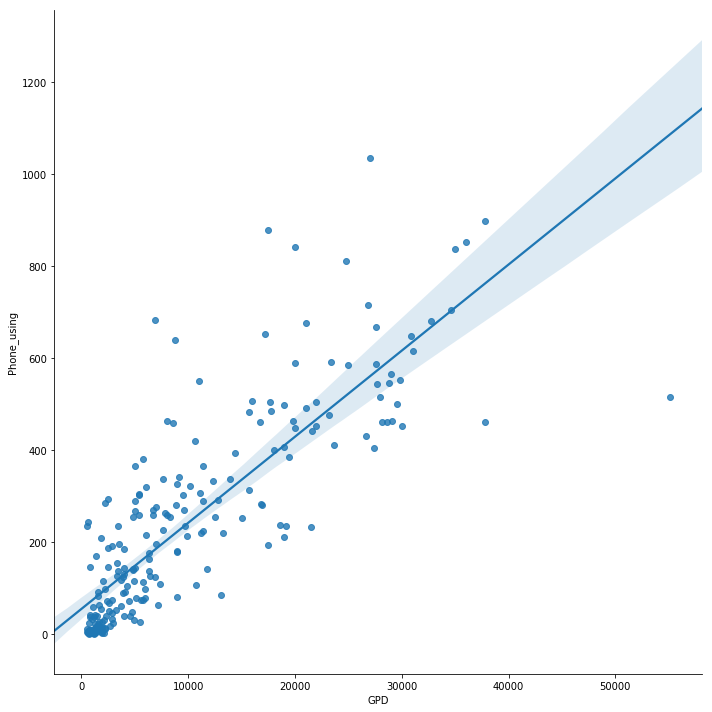

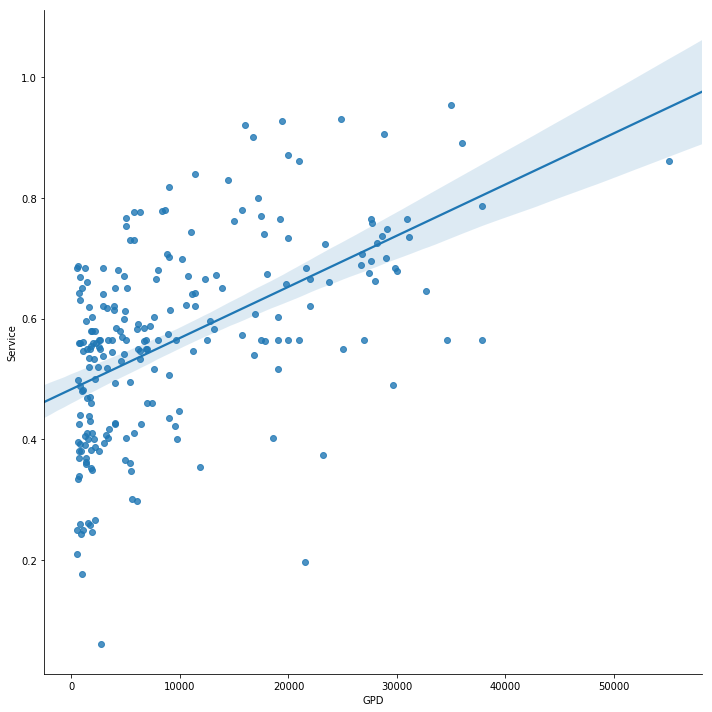

In [21]:
sns.lmplot(x="GPD",y="Phone_using",data=data,height=10)
sns.lmplot(x="GPD",y="Service",data=data,height=10)

In [22]:
LE = LabelEncoder()
data['Regional'] = LE.fit_transform(data['Region'])
data['Climate'] = LE.fit_transform(data['Climate'])
data.head(10)
X = data[['Population', 'Area',
       'Pop_Density', 'Coastline',
       'Net_migration', 'Infant_mortality',
       'Literacy', 'Phone_using',
       'Arable', 'Crops', 'Other', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Persons/sq. mi.', 'Regional', 'Climate']]
y = data['GPD']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 4.16353238e-06  2.83563052e-04  9.26017352e+03 -2.78244967e+00
  3.32965147e+02 -8.06359140e+00  7.84002503e+00  2.62782250e+01
 -7.93548015e+04 -7.92781233e+04 -7.92702346e+04 -1.89664435e+02
  3.58210283e+01 -3.36041480e+04 -2.56914674e+04 -2.99287436e+04
 -9.26022710e+03  5.16244621e+02  2.12114981e+02]


Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**


In [29]:
predictions = lm.predict( X_test)

Text(0,0.5,'Predicted Y')

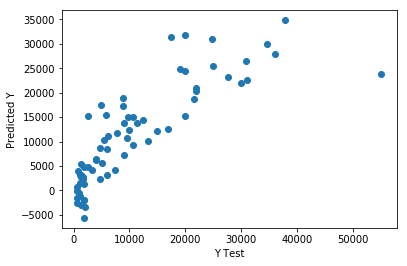

In [30]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [31]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4404.726098908337
MSE: 39795724.858871184
RMSE: 6308.385281422749


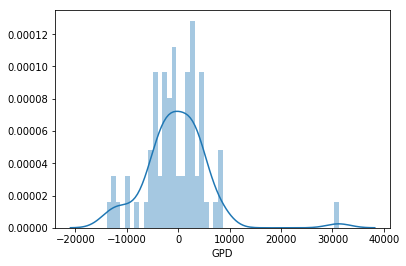

In [32]:
sns.distplot((y_test-predictions),bins=50);

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}

model = RandomForestRegressor(random_state=0)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train, y_train)

print(grid.best_score_)
print(grid.best_params_)

0.8366647971501137
{'bootstrap': True, 'max_depth': None, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [39]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=5, 
                                  min_samples_leaf=1, min_samples_split=5, bootstrap=False)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [40]:
regressor.score(X_test, y_test)

0.8071254859209552

In [43]:
y_pred = regressor.predict(X_test)

Text(0,0.5,'Predicted Y')

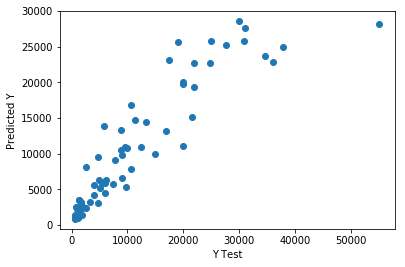

In [46]:

plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2833.5161547176276
MSE: 25229978.89555277
RMSE: 5022.945241146152
